<a href="https://colab.research.google.com/github/Ana-Paula-Ferrari/data_science/blob/main/series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Séries Temporais**

Estuda o comportamento de uma variável contínua ao longo do tempo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline
from datetime import datetime
#registro de converters para o uso da matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Tratamento dos dados e análise exploratória 

In [2]:
base = pd.read_csv('AirPassengers.csv')
base.head()
#base.shape

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
#Visualização do tipo de dadados dos atributos
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [4]:
#Conversão dos atributos que estão no formato string para o formato de data: ANO-MÊS
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], 
            index_col = 'Month', date_parser = dateparse)
base.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
#Visualização do índice do dataframe(#Passengers)
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
#Criação da Série Temporal
ts = base['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [7]:
#Visualização de registro específico
ts[1]

118

In [8]:
#Visualização por ano e mês
ts['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [9]:
#Visualização de data específica
ts[datetime(1949,2,1)]

118

In [10]:
#Visualização de intervalos
ts['1950-01-01' : '1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [11]:
#Visualização de intervalos sem preencher a data de início
ts[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [12]:
#Visualização por ano
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [13]:
#Valores máximos
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [14]:
#Valores mínimos
ts.index.min()

Timestamp('1949-01-01 00:00:00')

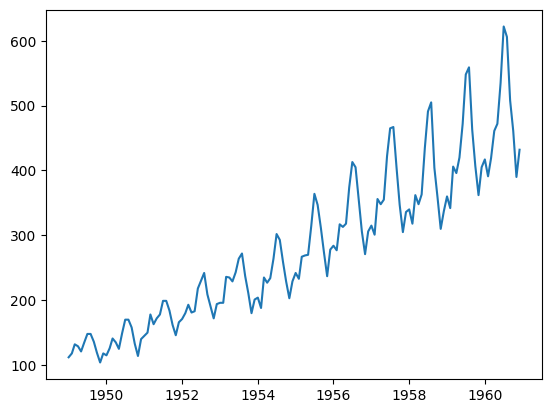

In [15]:
#Visualização da série temporal completa
plt.plot(ts)

Month
1949-12-31    1520
1950-12-31    1676
1951-12-31    2042
1952-12-31    2364
1953-12-31    2700
1954-12-31    2867
1955-12-31    3408
1956-12-31    3939
1957-12-31    4421
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: A-DEC, Name: #Passengers, dtype: int64

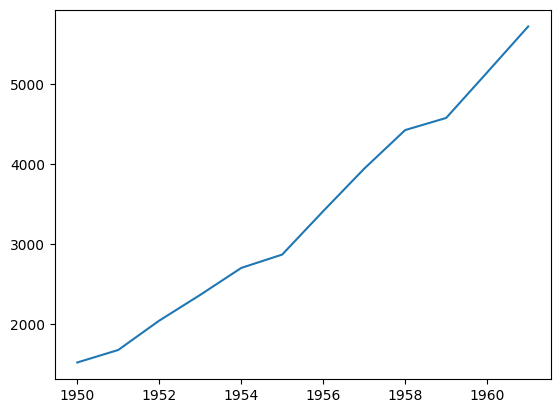

In [16]:
#Visualização por ano -> soma
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)
ts_ano

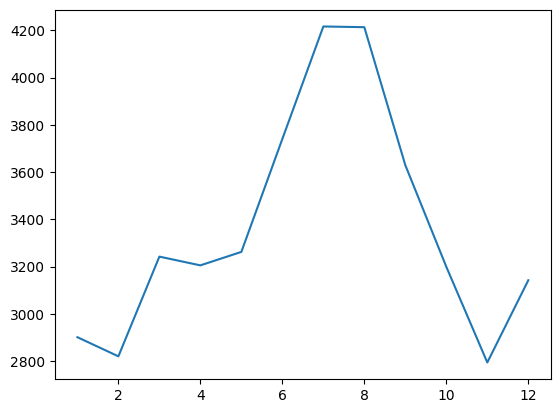

In [17]:
#Visualização por mês
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

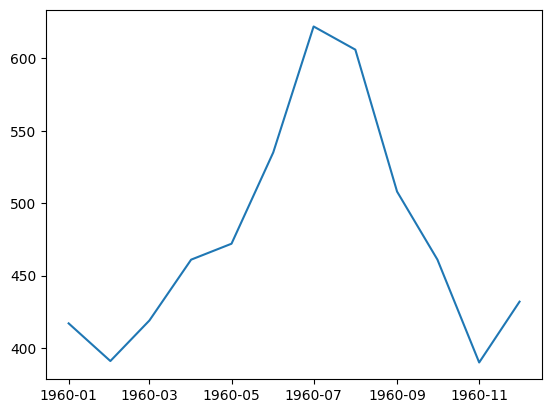

In [18]:
#Visualização entre datas específicas
ts_datas = ts['1960-01-01' : '1960-12-01']
plt.plot(ts_datas)

Decomposição

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
decomposicao = seasonal_decompose(ts)

In [21]:
tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [22]:
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [23]:
#erro
aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

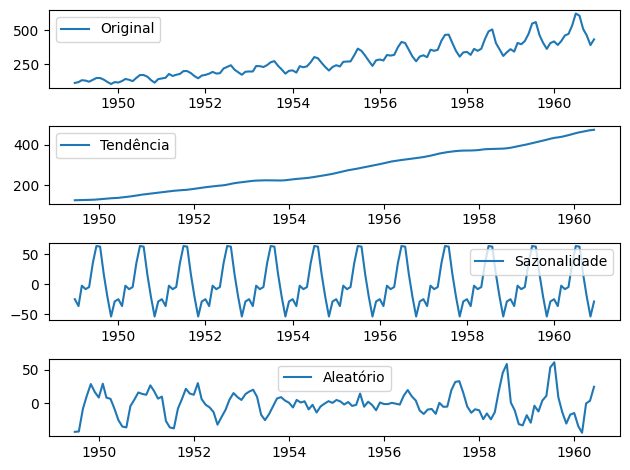

In [24]:
#Visualização dos gráficos
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

#tendencia
plt.subplot(4,1,2)
plt.plot(tendencia, label='Tendência')
plt.legend(loc = 'best')

#sazonalidade
plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

#erro
plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aleatório')
plt.legend(loc = 'best')

plt.tight_layout()

Previsões com Arima

In [27]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.1 MB/s eta 0:00:00


In [28]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pmdarima.arima import auto_arima


In [29]:
#p - ordem da parte autoregressiva/ d - grau de diferenciação/ q - ordem da média móvel / arima sazonal -P,Q,D/ Minimizar AIC ou BIC
stepwise_model = auto_arima(base, start_p=1, start_q=1, start_d= 0 , start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)#stepwise =False - testa todas as combinações/ m - periodo

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.10 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.34 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.20 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.52 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.19 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.63 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.94 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.15 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.50 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.49 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=2.36 sec
 ARIM

In [30]:
print(stepwise_model.aic())

1012.9907964895799


In [31]:
train = base.loc['1949-01-01' : '1959-12-01'] #dados para treino
test = base.loc['1960-01-01' :] #dados para teste

In [32]:
#train

In [33]:
#test

In [34]:
#treinando o modelo
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [35]:
#previsão para o ano de 1960
future_forecast = stepwise_model.predict(n_periods=12)

In [36]:
future_forecast

1960-01-01    420.248524
1960-02-01    398.467270
1960-03-01    461.924955
1960-04-01    450.705407
1960-05-01    474.027678
1960-06-01    537.927076
1960-07-01    612.254751
1960-08-01    623.611980
1960-09-01    520.187427
1960-10-01    462.338878
1960-11-01    412.953715
1960-12-01    453.780372
Freq: MS, dtype: float64

In [37]:
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns=['#Passengers'])

<Axes: xlabel='Month'>

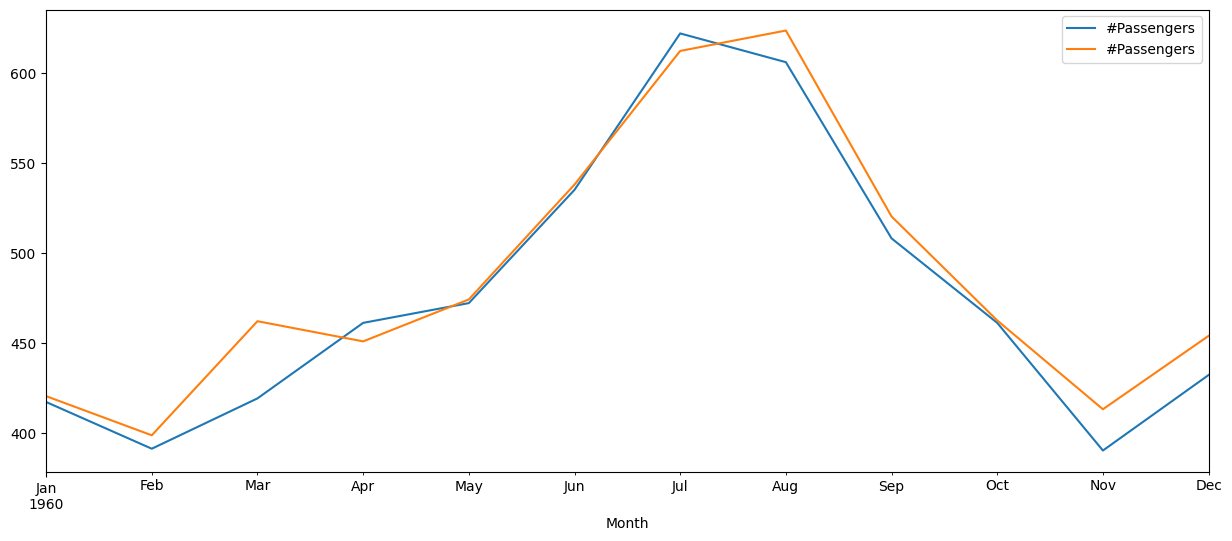

In [38]:
#Visualizar dados de teste(azul) comparados a previsão forecast(laranja) para o ano de 1960
pd.concat([test, future_forecast], axis=1).plot()

<Axes: xlabel='Month'>

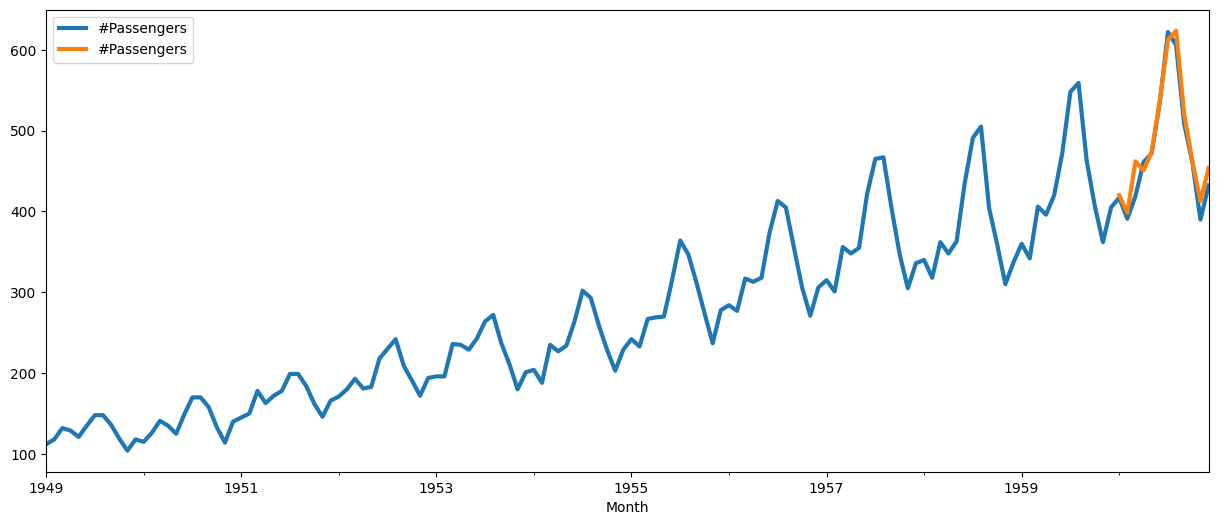

In [39]:
#Visualizar todos os dados com a previsão forecast(laranja) 
pd.concat([base, future_forecast], axis=1).plot(linewidth=3)

<Axes: xlabel='Month'>

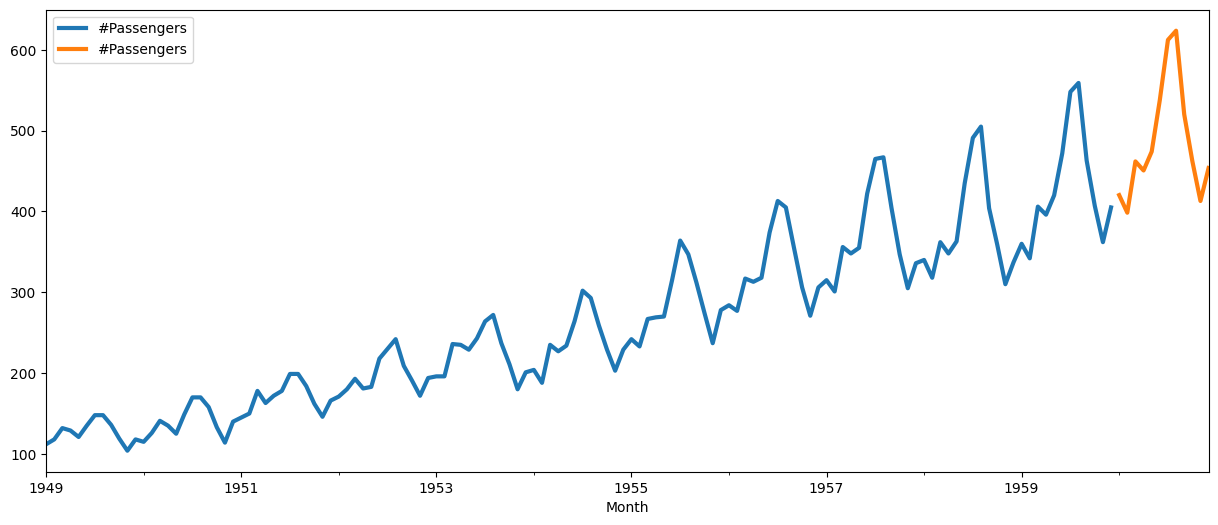

In [40]:
#Visualizar os dados treinados com a previsão(laranja)
pd.concat([train, future_forecast], axis=1).plot(linewidth=3)